Dervla Gargan - 22346279
Mark Langtry - 22340475
Amy McMahon - 22346619

Code executed without errors :)

**Links used**

Importing librarys

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import tensorflow as tf

KeyboardInterrupt: 

In [ ]:
if not tf.config.list_physical_devices('GPU'):
    print("Get a GPU ......")

Get a GPU ......


Setting Up environment

In [ ]:
env = gym.make('MountainCar-v0', render_mode='human')
env.reset()

(array([-0.4617619,  0.       ], dtype=float32), {})

Env variables

In [ ]:
space =  env.observation_space
actions = env.action_space
EPSILON = 1
NUM_ACTIONS = actions.n
LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.1
NUM_EPISODES = 1000
rewards_per_episode= []
EPSILON = 1
EPSILON_DECAY = 2/NUM_EPISODES


Create model

In [ ]:
state_shape = env.observation_space.shape

model = tf.keras.Sequential([
        tf.keras.layers.Dense(24, activation='relu', input_shape=state_shape),
        tf.keras.layers.Dense(48, activation='relu'),
        tf.keras.layers.Dense(NUM_ACTIONS,activation='linear')
])

Segmenting velocity and position 

In [ ]:
position = np.linspace(space.low[0], space.high[0], 20)
velocity = np.linspace(space.low[1], space.high[1], 20)

q_values = np.zeros((len(position), len(velocity), NUM_ACTIONS))

In [ ]:
def select_action(position, velocity):
    if np.random.random() < EPSILON:
        action = np.random.randint(0, NUM_ACTIONS)
    else:
        action = np.argmax(model.predict(np.array([[position, velocity]]))[0])

    
    return action
                

In [ ]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() >= epsilon:
        return np.random.randint(n_outputs)
    else:
        Q_values = model.predict(state[np.newaxis], verbose=0)[0]
        return Q_values.argmax()

In [ ]:
def train(EPSILON, EPSILON_DECAY):
    state = env.reset()[0]
    state_position = np.digitize(state[0], position)
    state_velocity = np.digitize(state[1], velocity)

    goal = False

    rewards = 0

    while not goal and rewards > -1000:
        action = select_action(state_position, state_velocity)
        next_state, reward, goal, _, _ = env.step(action)
        next_state_position = np.digitize(next_state[0], position)
        next_state_velocity = np.digitize(next_state[1], velocity)
        max_q_value_next_state = np.max(q_values[next_state_position][next_state_velocity])
        q_values[state_position][state_velocity][action] += LEARNING_RATE * (reward + DISCOUNT_FACTOR * 
                                max_q_value_next_state - q_values[state_position][state_velocity][action])
        state_position = next_state_position
        state_velocity = next_state_velocity

        rewards += reward

    rewards_per_episode.append(rewards)
    NEW_EPSILON = max(EPSILON - EPSILON_DECAY, 0)
    return NEW_EPSILON
    



In [ ]:
for episode in range(NUM_EPISODES):
    env.render()
    EPSILON = train(EPSILON, EPSILON_DECAY)

env.close()

c:\Users\admcm\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


1/1 [==============================] - 0s 21ms/step


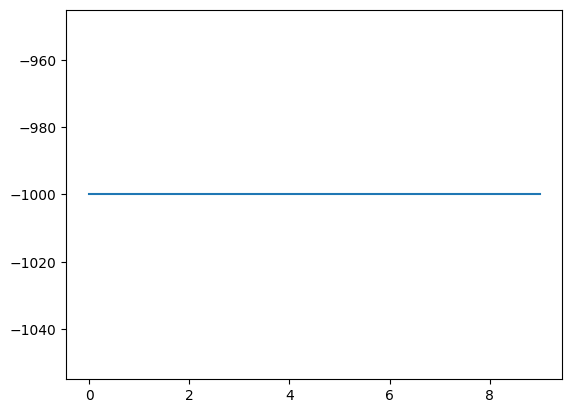

In [ ]:
mean_rewards = np.zeros(NUM_EPISODES)
for t in range(NUM_EPISODES):
    mean_rewards[t] = np.mean(rewards_per_episode[max(0, t-100):(t+1)])
plt.plot(mean_rewards)